In [11]:

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


BUSINESS CASE

As social media websites have become the de facto public forum, Twitter has taken a unique place as a cultural arbiter of sorts. More than 330 million people have twitter accounts all over the world and with the globalization of nearly every idea, product, and trend, it's imperative to monitor what consumers are saying about your product and your company: just ask Samsung. Thus, our goal with this project, is to take a thousands of tweets and use NLP to predict whether the tweet is positive or negative. 

DATA EXTRACTION

The dataset we are going to use is provided by CrowdFlower and can be downloaded here. Make sure not to copy my filepath since yours will be different. https://data.world/crowdflower/brands-and-product-emotions

EDA

Let's get started by reading in the dataset!

In [12]:
df = pd.read_csv('/Users/kaoliver/Downloads/judge-1377884607_tweet_product_company.csv', encoding='mac-roman')

In [13]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Eesh, looks like we're gonna need to clean this up. But first, lets get some more info. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [15]:
df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

In [16]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


First things first, I hate how long the column names are. Let's rename them. 

In [17]:
df =df.rename(columns={'emotion_in_tweet_is_directed_at': 'company',
                       'is_there_an_emotion_directed_at_a_brand_or_product' : 'emotion'})

In [18]:
df.head()

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Much better. Now let's explore. 

In [19]:
df.shape

(9093, 3)

In [20]:
df['company'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [21]:

df['emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [22]:
df['company'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: company, dtype: int64

In [23]:
df['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [24]:
df['company'].isna().sum()

5802

In [25]:
df['emotion'].isna().sum()

0

In [26]:
df['tweet_text'].isna().sum()

1

<AxesSubplot:ylabel='emotion'>

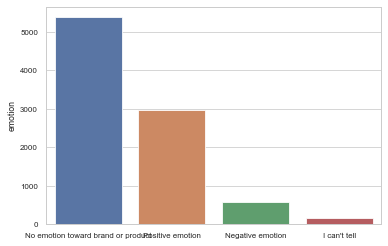

In [27]:

sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=0.9)  
sns.barplot(x=df['emotion'].value_counts().index, 
            y=df['emotion'].value_counts())

<AxesSubplot:ylabel='emotion'>

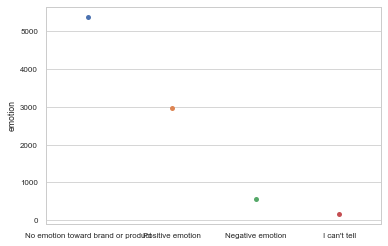

In [28]:
sns.swarmplot(x=df['emotion'].value_counts().index, 
               y=df['emotion'].value_counts())

Alright, since I wanna start with a binary classifier, 
we need to get rid of everything besides positive and negative. 
This is gonna make the data set much smaller, but we can always 
go back and add stuff back in if we have time. (I didn't have time)

In [29]:
new_df =  df[df.emotion != "I can't tell"]

In [30]:
new_df

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [31]:
third_df = new_df[new_df.emotion != 'No emotion toward brand or product']

In [32]:
third_df.head()

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


That should do it. Let's make a graph to see what we're working with. 

<AxesSubplot:ylabel='emotion'>

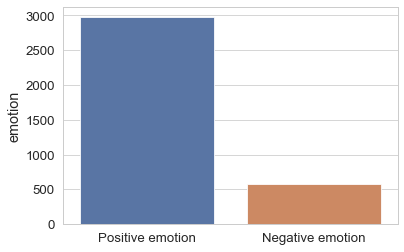

In [33]:
sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=1.5)  
sns.barplot(x=third_df['emotion'].value_counts().index, 
            y=third_df['emotion'].value_counts())


In [34]:
third_df['emotion'].value_counts()

Positive emotion    2978
Negative emotion     570
Name: emotion, dtype: int64

As you can see, there is a substantial class imbalance. We're not gonna worry about that now though. 
Let's clean up the company column. 

In [35]:
third_df['company'].value_counts()

iPad                               918
Apple                              638
iPad or iPhone App                 460
Google                             414
iPhone                             287
Other Google product or service    283
Android App                         80
Android                             77
Other Apple product or service      34
Name: company, dtype: int64

<AxesSubplot:ylabel='company'>

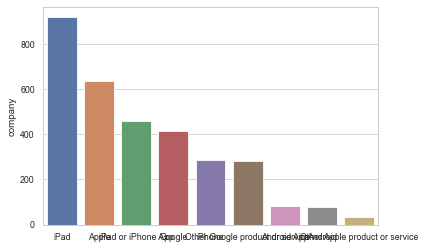

In [36]:
sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=1)  
sns.barplot(x=third_df['company'].value_counts().index, 
            y=third_df['company'].value_counts())


Our only interest is in tweets directed at Apple and Google, so we can punt the 
Android tweets. 

In [37]:
fourth_df = third_df[third_df.company != 'Android App']

In [38]:
fourth_df

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [39]:
fifth_df = fourth_df[fourth_df.company != 'Android']

In [40]:
fifth_df

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [41]:
fifth_df['company'].value_counts()

iPad                               918
Apple                              638
iPad or iPhone App                 460
Google                             414
iPhone                             287
Other Google product or service    283
Other Apple product or service      34
Name: company, dtype: int64

Once again, we need to make this easy on ourselves. I'm thinking we combine everything into two
simple categories: "Apple" and "Google"

In [42]:
fifth_df['company'] = fifth_df['company'].replace(['iPad'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
fifth_df['company'].value_counts()

Apple                              1556
iPad or iPhone App                  460
Google                              414
iPhone                              287
Other Google product or service     283
Other Apple product or service       34
Name: company, dtype: int64

In [44]:
fifth_df['company'] = fifth_df['company'].replace(['iPad or iPhone App'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
fifth_df['company'] = fifth_df['company'].replace(['Other Apple product or service'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
fifth_df['company'] = fifth_df['company'].replace(['iPhone'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
fifth_df['company'] = fifth_df['company'].replace(['Other Google product or service'], 'Google')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
fifth_df['company'].value_counts()

Apple     2337
Google     697
Name: company, dtype: int64

In [49]:
fifth_df['emotion'].value_counts()

Positive emotion    2837
Negative emotion     554
Name: emotion, dtype: int64

In [50]:
fifth_df.head()

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


That should do the trick! Let's get it up on a graph. 

<AxesSubplot:ylabel='company'>

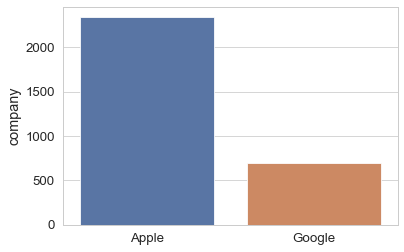

In [51]:
sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=1.5)  
sns.barplot(x=fifth_df['company'].value_counts().index, 
            y=fifth_df['company'].value_counts())

Ah, much better isn't it? Well, it turns out we're gonna need to delete company anyway for the time being, 
but save this! We will return to this data set if there is time!

In [52]:
sixth_df = fifth_df.drop(columns='company')

In [53]:
sixth_df.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


TOKENIZATION

In [54]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for sent in sixth_df['tweet_text']:
    print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

['.', '@wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#SXSW', '.']
['@jessedee', 'Know', 'about', '@fludapp', '?', 'Awesome', 'iPad', '/', 'iPhone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design', '.', 'Also', ',', "they're", 'giving', 'free', 'Ts', 'at', '#SXSW']
['@swonderlin', 'Can', 'not', 'wait', 'for', '#iPad', '2', 'also', '.', 'They', 'should', 'sale', 'them', 'down', 'at', '#SXSW', '.']
['@sxsw', 'I', 'hope', 'this', "year's", 'festival', "isn't", 'as', 'crashy', 'as', 'this', "year's", 'iPhone', 'app', '.', '#sxsw']
['@sxtxstate', 'great', 'stuff', 'on', 'Fri', '#SXSW', ':', 'Marissa', 'Mayer', '(', 'Google', ')', ',', 'Tim', "O'Reilly", '(', 'tech', 'books', '/', 'conferences', ')', '&', 'Matt', 'Mullenweg', '(', 'Wordpress', ')']
['Beautifully', 'smart', 'and', 'simple', 'idea', 'RT', '@madebymany'

In [55]:
from nltk.tokenize import WordPunctTokenizer
punct_tokenizer = WordPunctTokenizer()
punct_tokens = []
for sent in sixth_df['tweet_text']:
    print(punct_tokenizer.tokenize(sent))
    punct_tokens.append(punct_tokenizer.tokenize(sent))

['.@', 'wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#', 'RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#', 'SXSW', '.']
['@', 'jessedee', 'Know', 'about', '@', 'fludapp', '?', 'Awesome', 'iPad', '/', 'iPhone', 'app', 'that', 'you', "'", 'll', 'likely', 'appreciate', 'for', 'its', 'design', '.', 'Also', ',', 'they', "'", 're', 'giving', 'free', 'Ts', 'at', '#', 'SXSW']
['@', 'swonderlin', 'Can', 'not', 'wait', 'for', '#', 'iPad', '2', 'also', '.', 'They', 'should', 'sale', 'them', 'down', 'at', '#', 'SXSW', '.']
['@', 'sxsw', 'I', 'hope', 'this', 'year', "'", 's', 'festival', 'isn', "'", 't', 'as', 'crashy', 'as', 'this', 'year', "'", 's', 'iPhone', 'app', '.', '#', 'sxsw']
['@', 'sxtxstate', 'great', 'stuff', 'on', 'Fri', '#', 'SXSW', ':', 'Marissa', 'Mayer', '(', 'Google', '),', 'Tim', 'O', "'", 'Reilly', '(', 'tech', 'books', '/', 'conferences', ')', '&', 'amp', ';', 'Matt', '

In [56]:
from nltk.tokenize import RegexpTokenizer
match_tokenizer = RegexpTokenizer("[\w']+")
match_tokens = []
for sent in sixth_df['tweet_text']:   
    print(match_tokenizer.tokenize(sent))
    match_tokens.append(match_tokenizer.tokenize(sent))

['wesley83', 'I', 'have', 'a', '3G', 'iPhone', 'After', '3', 'hrs', 'tweeting', 'at', 'RISE_Austin', 'it', 'was', 'dead', 'I', 'need', 'to', 'upgrade', 'Plugin', 'stations', 'at', 'SXSW']
['jessedee', 'Know', 'about', 'fludapp', 'Awesome', 'iPad', 'iPhone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design', 'Also', "they're", 'giving', 'free', 'Ts', 'at', 'SXSW']
['swonderlin', 'Can', 'not', 'wait', 'for', 'iPad', '2', 'also', 'They', 'should', 'sale', 'them', 'down', 'at', 'SXSW']
['sxsw', 'I', 'hope', 'this', "year's", 'festival', "isn't", 'as', 'crashy', 'as', 'this', "year's", 'iPhone', 'app', 'sxsw']
['sxtxstate', 'great', 'stuff', 'on', 'Fri', 'SXSW', 'Marissa', 'Mayer', 'Google', 'Tim', "O'Reilly", 'tech', 'books', 'conferences', 'amp', 'Matt', 'Mullenweg', 'Wordpress']
['Beautifully', 'smart', 'and', 'simple', 'idea', 'RT', 'madebymany', 'thenextweb', 'wrote', 'about', 'our', 'hollergram', 'iPad', 'app', 'for', 'sxsw', 'http', 'bit', 'ly', 'ieaVOB']
['Coun

In [57]:
X = fifth_df.tweet_text
y = fifth_df.emotion

In [58]:
#complete train test split, pass original data into the TTS function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [59]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=stopwords.words('english'))


In [61]:
X_t_vec = tfidf.fit_transform(X_t)

In [62]:
X_t_vec = pd.DataFrame(X_t_vec.toarray(), columns = tfidf.get_feature_names())
X_t_vec.head()

,aapl,ability,able,abroad,abt,abuzz,acc,access,accessibility,accessories,...,zeldman,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MODELING

In [64]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_t_vec, y_t)

log_r.score(X_t_vec, y_t)

0.8500262191924489

In [65]:
X_val_vec = tfidf.transform(X_val)
y_hat = log_r.predict(X_val_vec)

print(log_r.score(X_val_vec, y_val))

0.8018867924528302


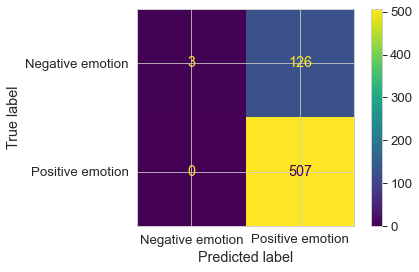

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_r, X_val_vec, y_val)

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)")
lr = LogisticRegression()
pipeline = make_pipeline(tfidf, lr)
pipeline

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(token_pattern="([a-zA-Z]+(?:'[a-z]+)?)")),
                ('logisticregression', LogisticRegression())])

In [68]:
cross_val_score(pipeline, X_train, y_train).mean()


0.8411328372754976

In [69]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(token_pattern="([a-zA-Z]+(?:'[a-z]+)?)")),
                ('logisticregression', LogisticRegression())])

In [70]:
pipeline.score(X_test, y_test)
y_hat = pipeline.predict(X_test)

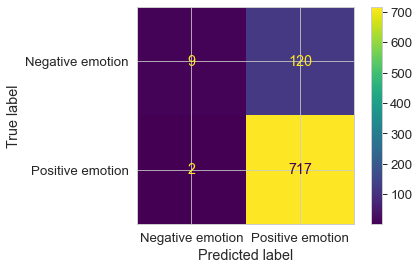

In [71]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_test, y_test)

In [72]:
from sklearn.metrics import accuracy_score
score = accuracy_score(X_val_vec, y_val)

TypeError: len() of unsized object